In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.columns
df.tail()
df[df.original_title== "Manos: The Hands of Fate"]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Droping usless columns

In [4]:
to_be_deleted = ["homepage", "tagline", "overview", 'id', 'imdb_id']

for movie in to_be_deleted:
    df.drop(columns=movie, axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

# Making all the missed values with "UNKNOWN" value as all of the missed data are strings  

In [6]:
df.fillna("UNKOWN", inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10866 non-null  object 
 5   director              10866 non-null  object 
 6   keywords              10866 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10866 non-null  object 
 9   production_companies  10866 non-null  object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

# Change release_date type from string to timestamp by converting release_year to string to get the accurate year of the date and use to_datetime() function

In [8]:
df.release_date.dtypes
df.release_year = df.release_year.astype(str)
df.release_year.dtypes

dtype('O')

In [9]:
#df.release_year.astype(str)
for i in range(10866):
    df.release_date[i] = df.release_date[i][:-2] + str(df.release_year[i])
    
df.release_date = pd.to_datetime(df.release_date)
df.tail()

<ipython-input-9-d96776aadaf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.release_date[i] = df.release_date[i][:-2] + str(df.release_year[i])


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


In [10]:
print(df.release_date.head(2))
print(df.release_date.dtypes)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]
datetime64[ns]


# Getting the oldest movie

In [11]:
oldest_movie_date = df.release_date.min()
oldest_movie_date

Timestamp('1960-01-01 00:00:00')

In [12]:
df[df.release_date == oldest_movie_date].original_title

10150           The Unforgiven
10152    The Brides of Dracula
Name: original_title, dtype: object

# The oldest two movies produced in 1960 were: 
    1- The Unforgiven
    2- The Brides of Dracula

# Getting the newest movie

In [13]:
newest_movie_date = df.release_date.max()
newest_movie_date

Timestamp('2015-12-31 00:00:00')

In [14]:
df[df.release_date == newest_movie_date].original_title

190    Open Season: Scared Silly
322                      Martyrs
Name: original_title, dtype: object

The newest two movies produced in 2015 were:
    1- Open Season: Scared Silly
    2- Martyrs

# The most popular movie

In [15]:
most_pop_idx = df.popularity.idxmax()

In [16]:
df.iloc[most_pop_idx].original_title

'Jurassic World'

The most popular movie is "Jurassic World", produced by: Universal Studios - Amblin Entertainment - Legendary Pictures - Fuji Television Network - Dentsu, directed by: Colin Trevorrow

# The least popular movie

In [17]:
least_pop_idx = df.popularity.idxmin()

In [18]:
df.iloc[least_pop_idx].original_title

'North and South, Book I'

The least popular movie is "North and South, Book I", Produced by: UNKNOWN company, directed by: UNKNOWN person

# Setting up revenues and budgets for each movie before and after 2010

In [19]:
df_before_2010 = df.copy()
df_before_2010.drop(df_before_2010[df_before_2010.release_year >= "2010"].index, inplace=True)
df_before_2010.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
1330,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,Lewis Gilbert,london|submarine|england|assassination|spy,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1977-07-07,279,6.2,1977,5.036893e+07,6.671677e+08
1331,1.719385,1200000,71215869,The Rescuers,Bob Newhart|Eva Gabor|Geraldine Page|Joe Flynn...,John Lounsbery|Wolfgang Reitherman|Art Stevens,mouse|baby-snatching|bottle|albatros|rescue,78,Fantasy|Family|Animation|Adventure,Walt Disney Productions,1977-06-22,332,6.6,1977,4.317337e+06,2.562191e+08
1332,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,neurosis|comedian|job interview|love|singer,93,Comedy|Drama|Romance,United Artists,1977-04-19,493,7.6,1977,1.439112e+07,1.376203e+08
1333,1.104997,10000000,0,Pete's Dragon,Sean Marshall|Helen Reddy|Mickey Rooney|Red Bu...,Don Chaffey,farm|friendship|part live action|escape|dragon,128,Fantasy|Animation|Comedy|Family,Walt Disney Productions,1977-11-03,113,6.4,1977,3.597781e+07,0.000000e+00


In [20]:
df_after_2010 = df.copy()
df_after_2010.drop(df_after_2010[df_after_2010.release_year < "2010"].index, inplace=True)
df_after_2010.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
df_before_2010["final_rev"] = df_before_2010.revenue
df_before_2010["final_budget"] = df_before_2010.budget

In [22]:
df_after_2010["final_rev"] = df_after_2010.revenue
df_after_2010["final_budget"] = df_after_2010.budget

In [23]:
new_rows = df_before_2010.append(df_after_2010)
df.drop(df.index, inplace=True)
df = df.append(new_rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 1329 to 6080
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10866 non-null  object        
 5   director              10866 non-null  object        
 6   keywords              10866 non-null  object        
 7   runtime               10866 non-null  int64         
 8   genres                10866 non-null  object        
 9   production_companies  10866 non-null  object        
 10  release_date          10866 non-null  datetime64[ns]
 11  vote_count            10866 non-null  int64         
 12  vote_average          10866 non-null  float64       
 13  release_year  

In [24]:
max_rev = df.final_rev.idxmax()

In [25]:
df.loc[max_rev]

popularity                                                       9.432768
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
keywords                culture clash|future|space war|space colony|so...
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                          

The maximum revenue is for "Avatar"

# Splitting and exploding columns ("cast", "keywords", "genres", "production_companies")

In [26]:
#splitting function
def splitting(df):
    return df.str.split("|")

In [27]:
df_cast = df.copy()
df_genres = df.copy()
df_production_companies = df.copy()

In [28]:
df_cast.cast = splitting(df["cast"])
df_genres.genres = splitting(df.genres)
df_production_companies.production_companies = splitting(df["production_companies"])

In [29]:
df_cast = df_cast.explode("cast", ignore_index=True)
df_genres = df_genres.explode("genres", ignore_index=True)
df_production_companies = df_production_companies.explode("production_companies", ignore_index=True)

In [30]:
df_genres.tail()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,final_rev,final_budget
26978,0.002648,0,0,Atlantic Rim,Graham Greene|David Chokachi|Jackie Moore|Nico...,Jared Cohn,navy|underwater threat|robot suits|giant monsters,85,Science Fiction,The Asylum|Tiki Terrors,2013-07-09,21,2.2,2013,0.0,0.0,0.0,0.0
26979,0.002647,0,0,Trophy Kids,UNKOWN,Chris Bell,UNKOWN,107,Documentary,UNKOWN,2013-12-04,10,7.8,2013,0.0,0.0,0.0,0.0
26980,0.002165,0,0,The Sound of Music Live!,Laura Benanti|Stephen Moyer|Carrie Underwood|C...,Beth McCarthy-Miller|Rob Ashford,musical|live|woman director,180,Drama,UNKOWN,2013-12-05,11,5.6,2013,0.0,0.0,0.0,0.0
26981,0.002165,0,0,The Sound of Music Live!,Laura Benanti|Stephen Moyer|Carrie Underwood|C...,Beth McCarthy-Miller|Rob Ashford,musical|live|woman director,180,Family,UNKOWN,2013-12-05,11,5.6,2013,0.0,0.0,0.0,0.0
26982,0.000620,0,0,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,Darren Stein,gay|gay kiss|coming out|high school|friends,92,Comedy,School Pictures|Parting Shots Media|Logolite E...,2013-10-20,82,6.1,2013,0.0,0.0,0.0,0.0


# The most popular genre year by year

In [31]:
df_genres.groupby(["genres","release_year"]).popularity.max()

genres   release_year
Action   1960            1.872132
         1961            0.754548
         1962            3.170651
         1963            2.508235
         1964            3.153791
                           ...   
Western  2011            1.640256
         2012            5.944518
         2013            1.214510
         2014            1.211609
         2015            9.110700
Name: popularity, Length: 1064, dtype: float64

# The rate of movie production by years

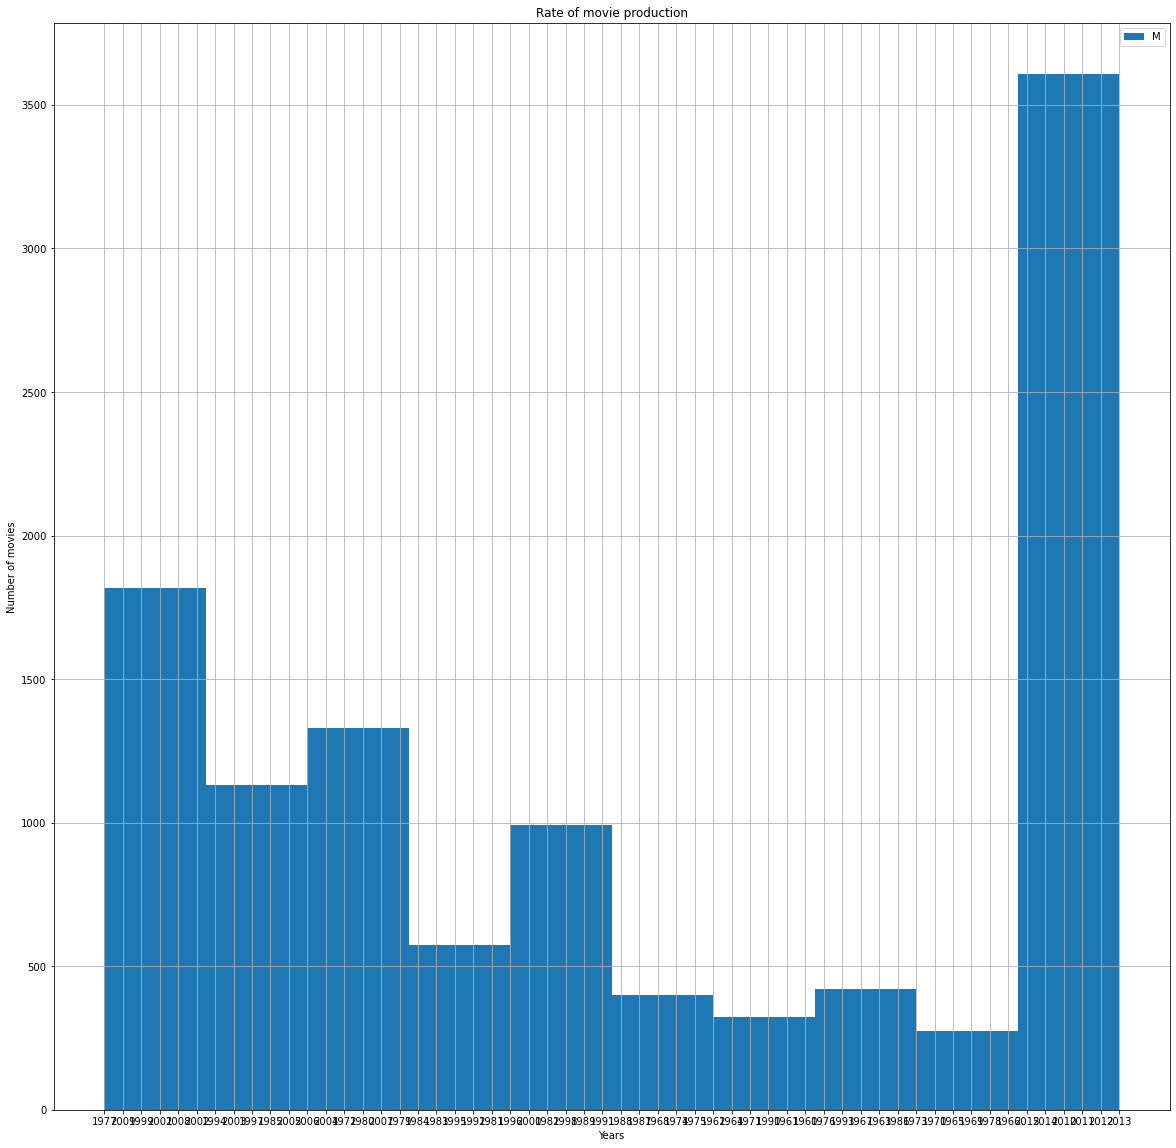

In [41]:
df.release_year.hist(figsize=(20,20),);
plt.title("Rate of movie production")
plt.xlabel("Years")
plt.ylabel("Number of movies")
plt.legend("Movies")
plt.show()

# The relation between the revenue and the budget

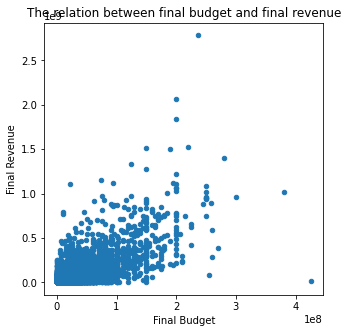

In [43]:
df.plot(y="final_rev", x="final_budget", kind="scatter", figsize=(5,5));
plt.title("The relation between final budget and final revenue")
plt.ylabel("Final Revenue")
plt.xlabel("Final Budget")
plt.show()

The relation between both of the is near to strong positiv relation

# The relation betweeen vote counts and popularity

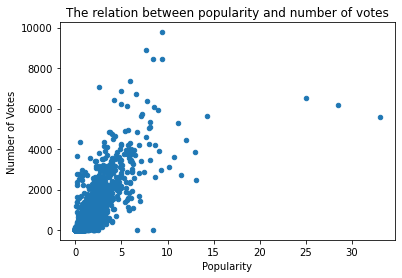

In [44]:
df.plot(y="vote_count", x="popularity", kind="scatter");
plt.title("The relation between popularity and number of votes")
plt.ylabel("Number of Votes")
plt.xlabel("Popularity")
plt.show()

# Correlation of the data

In [35]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,final_rev,final_budget
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.513550,0.609083,0.663358,0.545472
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.968963,0.622505,0.734901,1.000000
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.706427,0.919110,1.000000,0.734901
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,0.221114,0.175676,0.162838,0.191283
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.587051,0.707942,0.791175,0.632702
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,0.093039,0.193085,0.172564,0.081014
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,1.000000,0.646607,0.706427,0.968963
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,0.646607,1.000000,0.919110,0.622505
final_rev,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.706427,0.919110,1.000000,0.734901
final_budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.968963,0.622505,0.734901,1.000000


# The movie with the highest vote average

In [36]:
highest_avrg_movie_idx = df.vote_average.idxmax()

In [37]:
df.loc[highest_avrg_movie_idx]

popularity                                                       0.006925
budget                                                                  0
revenue                                                                 0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                                     Mark Cousins
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
runtime                                                               900
genres                                                        Documentary
production_companies                                               UNKOWN
release_date                                          2011-09-03 00:00:00
vote_count                                                             14
vote_average                                                          9.2
release_year                          

The highest vote average movie is "The Story of Film: An Odyssey"

# The most actress did movies

In [38]:
df_cast.cast.value_counts()

UNKOWN               76
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
                     ..
Dylan Purcell         1
Selina Giles          1
Timyra-Joi Beatty     1
Gus Rose              1
Erik Thomson          1
Name: cast, Length: 19027, dtype: int64

In this data the most actress acted in movies is "Robert De Niro" who acted in 72 movie

# The most production company produced movies

In [39]:
df_production_companies.production_companies.value_counts()

UNKOWN                                      1030
Universal Pictures                           522
Warner Bros.                                 509
Paramount Pictures                           431
Twentieth Century Fox Film Corporation       282
                                            ... 
Alliance                                       1
Internationale Filmproduktion Prometheus       1
Golden Port Productions Ltd.                   1
Milchan / Van Eyssen                           1
Virgin Vision                                  1
Name: production_companies, Length: 7880, dtype: int64

In this data the most production company produced movies is "Universal Pictures" who produced 522 movie

# The most genre produced

In [40]:
df_genres.genres.value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
UNKOWN               23
Name: genres, dtype: int64

Drama is the most produced genre 

# Conclusion

From the given data:
 1- There is a strong positive relation between the budget and the revenue so as the the budget increases the revenue     also increases but it is not 1:1 relation.
 
 2- The most produced genre is Drama.
 
 3- The highest vote average movie is "The Story of Film: An Odyssey".
 
Limitations:
 1- One from limitions i have faced is existing of null values for many production companies and directors and i        s  replaced all null values with "UKNOWN" value and excluded them from my statistical calculations
 
 2- Another limition i have faced that alot of actress names and production companies are put in the same cell so i      splitted all of them then exploded them into many rows and assigned them with the rest of the dataframe to a new      copy of the main dataframe